## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
# %matplotlib widget

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()
study_results.head()
# Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer' )
# Display the data table for preview
df.head()
# df.shape

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

df1 = df[df.duplicated(['Mouse ID','Timepoint'])]

df1.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

new_df = df[df.duplicated(['Mouse ID'])]
new_df.shape
# new_df.head()

(1644, 8)

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='first')

clean_df.head()


# clean_df.shape

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df)


1888

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mice_df = clean_df.groupby(['Drug Regimen'])

tumor_vol_mean = mice_df['Tumor Volume (mm3)'].mean()
tumor_vol_median = mice_df['Tumor Volume (mm3)'].median()
tumor_vol_std = mice_df['Tumor Volume (mm3)'].std()
tumor_vol_var = mice_df['Tumor Volume (mm3)'].var()
tumor_vol_sem = mice_df['Tumor Volume (mm3)'].sem()

summary_regimen = {    'Tumor Vol Mean': tumor_vol_mean, 
                     'Tumor Vol Median': tumor_vol_median, 
                     'Tumor Vol StD': tumor_vol_std,
                     'Tumor Vol Var': tumor_vol_var,
                     'Tumor Vol SEM': tumor_vol_sem
                    }

summary_regimen_df = pd.DataFrame(summary_regimen)
summary_regimen_df




,Tumor Vol Mean,Tumor Vol Median,Tumor Vol StD,Tumor Vol Var,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.393463,50.909965,6.568014,43.138803,0.525862
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
mice_df['Tumor Volume (mm3)'].describe()

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,156.0,52.393463,6.568014,45.000000,47.046068,50.909965,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Bar and Pie Charts

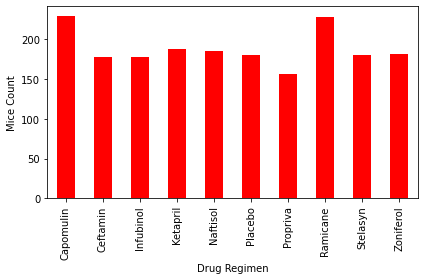

In [9]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

mcount_df = pd.DataFrame(clean_df.groupby(['Drug Regimen'])['Mouse ID'].count())
mcount_df.rename(columns = {'Mouse ID': 'Mice Count'}, inplace=True)
mcount_df

mcount_df.plot(kind='bar', color='r', legend=False)
plt.ylabel('Mice Count')

plt.tight_layout()


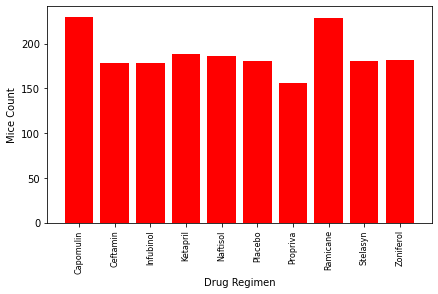

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

x_axis = np.arange(len(mcount_df.index))
labels = list(mcount_df.index)

plt.bar(x_axis, mcount_df['Mice Count'], color='r')
plt.xticks(x_axis, labels, rotation=90, fontsize=8)
plt.tight_layout()
plt.xlabel('Drug Regimen')
plt.ylabel('Mice Count')
plt.show()


array([<AxesSubplot:ylabel='Mice Count'>], dtype=object)

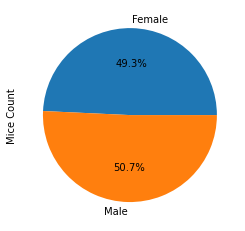

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gcount_df = pd.DataFrame({'Mice Count':clean_df.groupby(['Sex'])['Mouse ID'].count()})

# gcount_df.reset_index(inplace=True)
gcount_df
gcount_df.plot.pie(legend=False, label= False, subplots=True, autopct="%1.1f%%")
# plt.title('Mice Count')

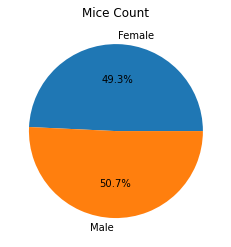

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gcount_df['Mice Count'], labels=list(gcount_df.index), autopct="%1.1f%%")

plt.title('Mice Count')

plt.show()

## Quartiles, Outliers and Boxplots

In [30]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp = clean_df['Timepoint'].max()

max_tp_data = clean_df.loc[((clean_df['Drug Regimen']=='Capomulin') | (clean_df['Drug Regimen']=='Ramicane')|(clean_df['Drug Regimen']=='Infubinol')|(clean_df['Drug Regimen']=='Ceftamin')) & (clean_df['Timepoint']==max_tp) ,['Drug Regimen', 'Tumor Volume (mm3)']]

# max_tp_Capomulin = clean_df.loc[(clean_df['Drug Regimen']=='Capomulin') & (clean_df['Timepoint']==max_tp) ,['Drug Regimen', 'Tumor Volume (mm3)']]

# max_tp_Ramicane = clean_df.loc[(clean_df['Drug Regimen']=='Ramicane') & (clean_df['Timepoint']==max_tp) ,['Drug Regimen', 'Tumor Volume (mm3)']]

# max_tp_Infubinol = clean_df.loc[(clean_df['Drug Regimen']=='Infubinol') & (clean_df['Timepoint']==max_tp) ,['Drug Regimen', 'Tumor Volume (mm3)']]

# max_tp_Ceftamin = clean_df.loc[(clean_df['Drug Regimen']=='Ceftamin') & (clean_df['Timepoint']==max_tp) ,['Drug Regimen', 'Tumor Volume (mm3)']]

# max_tp_df = pd.concat([max_tp_Capomulin, max_tp_Ramicane, max_tp_Infubinol, max_tp_Ceftamin ])
# # max_tp_Capomulin
# # max_tp_Ramicane
# # max_tp_Infubinol
# # max_tp_Ceftamin   

# max_tp_df
            
max_tp_data.rename()
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Drug Regimen,Tumor Volume (mm3)
9,Ramicane,22.050126
19,Capomulin,23.343598
29,Capomulin,28.484033
39,Capomulin,28.430964
49,Ramicane,29.128472
...,...,...
1797,Ceftamin,61.386660
1813,Infubinol,67.685569
1845,Ceftamin,68.594745
1855,Ceftamin,64.729837


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
